### Perimeter Institute Nov 16th
### 2018 computational physics course
# Exact Diagonalization
 
Guifre Vidal  

# IJulia nb2: quantum Ising model

In [2]:
using LinearAlgebra

In [2]:
# Pauli matrices X and Z, and identity matrix I
X = [0. 1; 1 0]
Z = [1. 0; 0 -1]
E = Matrix(1.0I, 2,2) # or E = [1 0; 0 1], or E = diagm(0=>[1; 1]), or diagm(0=>ones(2))
XX = kron(X,X)
display(Z)
display(X)
display(E)
display(XX)

2×2 Array{Float64,2}:
 1.0   0.0
 0.0  -1.0

2×2 Array{Float64,2}:
 0.0  1.0
 1.0  0.0

2×2 Array{Float64,2}:
 1.0  0.0
 0.0  1.0

4×4 Array{Float64,2}:
 0.0  0.0  0.0  1.0
 0.0  0.0  1.0  0.0
 0.0  1.0  0.0  0.0
 1.0  0.0  0.0  0.0

### Hamiltonian for $N$ spins (use $N\leq 10$) 

In [8]:
# Ising Hamiltonian for N spins  with exact diagonalization
N = 3
theta = pi/4 # magnetic field
HXX = XX
HZ = kron(Z,E) + kron(E,Z)
for n = 3:N
    HXX = kron(HXX,E)+kron(diagm(0=>ones(2^(n-2))), XX)
    HZ =  kron(HZ,E) + kron(diagm(0=>ones(2^(n-1))),Z)
end
HXX = HXX + kron(X,kron(diagm(0=>ones(2^(N-2))),X))
H = -cos(theta)*HXX - sin(theta)*HZ

display(H)

8×8 Array{Float64,2}:
 -2.12132   -0.0       -0.0       …  -0.707107  -0.707107  -0.0     
 -0.0       -0.707107  -0.707107     -0.0       -0.0       -0.707107
 -0.0       -0.707107  -0.707107     -0.0       -0.0       -0.707107
 -0.707107  -0.0       -0.0          -0.707107  -0.707107  -0.0     
 -0.0       -0.707107  -0.707107     -0.0       -0.0       -0.707107
 -0.707107  -0.0       -0.0       …   0.707107  -0.707107  -0.0     
 -0.707107  -0.0       -0.0          -0.707107   0.707107  -0.0     
 -0.0       -0.707107  -0.707107     -0.0       -0.0        2.12132 

###  magnetic field angle $\theta \in [0,\pi/2]$ 

In [4]:
N_theta=21  # number of values of magnetic field
d_theta = pi/(2*(N_theta-1)) # increments of theta
theta_val = collect(0:d_theta:pi/2) # list of magnetic field angle theta [0, pi/2] to be considered
Energies = zeros(2^3,N_theta)
for i=1:N_theta
    H = -cos(theta_val[i])*HXX - sin(theta_val[i])*HZ # build the Hamiltonian
    D,U = eigen(H)          # diagonalize the Hamiltonian
    Energies[:,i] = D
end
[theta_val Energies[1,:]]

21×2 Array{Float64,2}:
 0.0        -3.0    
 0.0785398  -2.99557
 0.15708    -2.98314
 0.235619   -2.96423
 0.314159   -2.94068
 0.392699   -2.9146 
 0.471239   -2.88836
 0.549779   -2.86443
 0.628319   -2.84521
 0.706858   -2.83275
 0.785398   -2.82843
 0.863938   -2.83275
 0.942478   -2.84521
 1.02102    -2.86443
 1.09956    -2.88836
 1.1781     -2.9146 
 1.25664    -2.94068
 1.33518    -2.96423
 1.41372    -2.98314
 1.49226    -2.99557
 1.5708     -3.0    

### Let us plot this!

In [5]:
using PyPlot

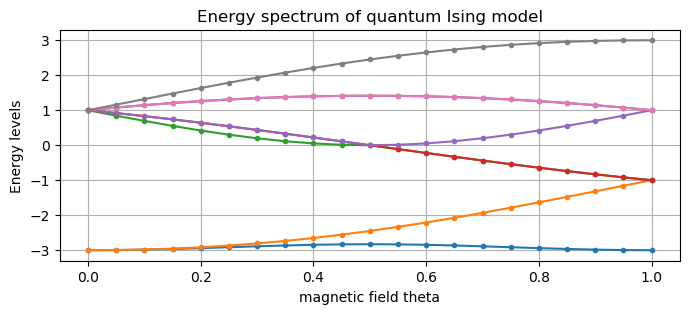

In [6]:
figure("My_figure",figsize=(8,3))
grid("on")
for i in 1:2^N
    plot(2*theta_val/pi,vec(Energies[i,:]), marker=".")
end
title("Energy spectrum of quantum Ising model")
xlabel("magnetic field theta")
ylabel("Energy levels");


# Now it's your turn! (1/3)
### 1) write a function buildH that builds the Hamiltonian for $N$ spins (use only for $N\leq 10$)
# Solution

In [3]:
# function buildH takes as input N (number of spins) and theta (magnetic field angle) and output H (Hamiltonian)

function buildH(N::Int64,theta::Float64)::Array{Float64,2} 
    X = [0. 1; 1 0]
    Z = [1. 0; 0 -1]
    E = diagm(0=>ones(2))
    XX = kron(X,X)
    HXX = XX
    HZ = kron(Z,E) + kron(E,Z)
    for n = 3:N
        HXX = kron(HXX,E)+kron(diagm(0=>ones(2^(n-2))), XX)
        HZ =  kron(HZ,E) + kron(diagm(0=>ones(2^(n-1))),Z)
    end
    HXX = HXX + kron(X,kron(diagm(0=>ones(2^(N-2))),X))
    H = -cos(theta)*HXX - sin(theta)*HZ
    return H
end

buildH(3,pi/4)

8×8 Array{Float64,2}:
 -2.12132   -0.0       -0.0       …  -0.707107  -0.707107  -0.0     
 -0.0       -0.707107  -0.707107     -0.0       -0.0       -0.707107
 -0.0       -0.707107  -0.707107     -0.0       -0.0       -0.707107
 -0.707107  -0.0       -0.0          -0.707107  -0.707107  -0.0     
 -0.0       -0.707107  -0.707107     -0.0       -0.0       -0.707107
 -0.707107  -0.0       -0.0       …   0.707107  -0.707107  -0.0     
 -0.707107  -0.0       -0.0          -0.707107   0.707107  -0.0     
 -0.0       -0.707107  -0.707107     -0.0       -0.0        2.12132 

### 2) plot the energy spectrum as a function of angle theta, $\theta \in [0,\pi/2]$, for $N=8$ spins
# Solution

In [5]:
N=8  # spin chain size N=10 and Nh = 21 takes approx 10 seconds
N_theta=21  # number of values of magnetic field
d_theta = pi/(2*(N_theta-1)) # increments of theta
theta_val = collect(0:d_theta:pi/2) # list of magnetix fields to be considered
Energies = zeros(2^N,N_theta)
for i=1:N_theta
    H = buildH(N,theta_val[i]) # build the Hamiltonian
    D,U = eigen(H)          # diagonalize the Hamiltonian
    Energies[:,i] = D
end

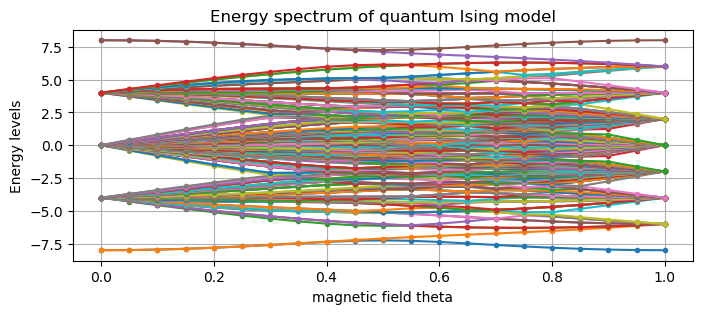

In [7]:
figure("My_figure",figsize=(8,3))
grid("on")
for i in 1:size(Energies,1)
    plot(2*theta_val/pi,vec(Energies[i,:]), marker=".")
end
title("Energy spectrum of quantum Ising model")
xlabel("magnetic field theta")
ylabel("Energy levels");

# Let us continue: 
### Translation operator $T$, with $[H,T]=0$ (translation invariance)

In [43]:
# Let us quickly rebuild the Hamiltonian for N=3 spins and magnetic field angle theta = pi/4
EE = kron(E,E)
HZ = kron(Z,EE) + kron(E,kron(Z,E)) + kron(EE,Z)
HXX = kron(XX,E)+kron(E,XX)+kron(X,kron(E,X))
H = -(HXX+HZ)/sqrt(2)
 
# The translation operator T is
SWAP = [1 0 0 0; 0 0 1 0; 0 1 0 0; 0 0 0 1]
N = 3
T = copy(SWAP)
for n=3:N
    SWAPn = kron(diagm(0=>ones(2^(n-2))), SWAP)
    T =  SWAPn*kron(T,E)
end
#display(SWAP)
#display(SWAP^2)
display(T)
#display(T^3)
#display(H3*T-T*H3)

8×8 Array{Float64,2}:
 1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0
 0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0
 0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0
 0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0

### Let us diagonalize $H$ and $T$ simultaneously, 
### $H |\Psi_i\rangle = e_i |\Psi_i\rangle$  and   $T |\Psi_i\rangle = \exp(ik_i) |\Psi_i\rangle$

In [44]:
HT = H + 0.0001*T 
D,U = eigen(HT);

### Let us compute and plot energies $e_i$ as a function of momenta $k_i$

In [45]:
e = real(diag(U'*H*U))  
k = angle.(diag(U'*T*U))

perm = sortperm(e) # re-order eigenvalues according to increasing energies e
e = e[perm]
k = k[perm] 

[e k]

8×2 Array{Float64,2}:
 -2.82843       0.0   
 -2.44949       0.0   
  0.0           0.0   
  2.34557e-31   2.0944
  2.34557e-31  -2.0944
  1.41421       2.0944
  1.41421      -2.0944
  2.44949       0.0   

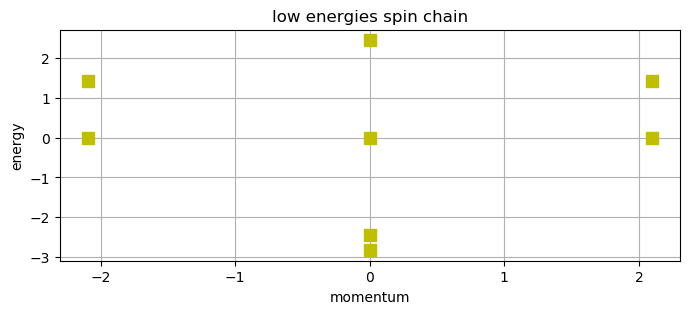

In [46]:
figure("low_energies",figsize=(8,3))

grid("on") # Create a grid on the axis
title("low energies spin chain")
#ax = gca()
#ax[:set_xlim]([-3,3])
#ax[:set_ylim]([-0.2,2.8])
xlabel("momentum")
ylabel("energy")
for i in 1:size(e,1)
    plot(k[i],e[i], marker = "s", markersize = 8, color = "y")
end


# It's your turn again! (2/3)
### 3) write a function buildT that builds the translation operator $T$ for $N$ spins (use only for $N\leq 10$)

In [9]:
# function buildT takes as input N (number of spins) and outputs T (translatio operator)
function buildT(N::Int64)::Array{Float64,2} 
    SWAP = [1 0 0 0; 0 0 1 0; 0 1 0 0; 0 0 0 1]
    E = diagm(0=>ones(2))
    T = copy(SWAP)
    for n=3:N
        SWAPn = kron(diagm(0=>ones(2^(n-2))), SWAP)
        T =  SWAPn*kron(T,E)
    end
    return T
end

buildT(3) # test for N=3 and critical angle pi/4

8×8 Array{Float64,2}:
 1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0
 0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0
 0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0
 0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0

### 4) compute and plot energies $e_i$ as a function of momenta $k_i$ for $N=8$ spins and $\theta=\pi/4$

In [10]:
N=8
H = buildH(N,pi/4)
T = buildT(N)
HT = H + 0.0001*T 
D,U = eigen(HT);

In [13]:
e = real(diag(U'*H*U))  
k = angle.(diag(U'*T*U))

perm = sortperm(e) # re-order eigenvalues according to increasing energies e
e = e[perm]
k = k[perm]
[e k];

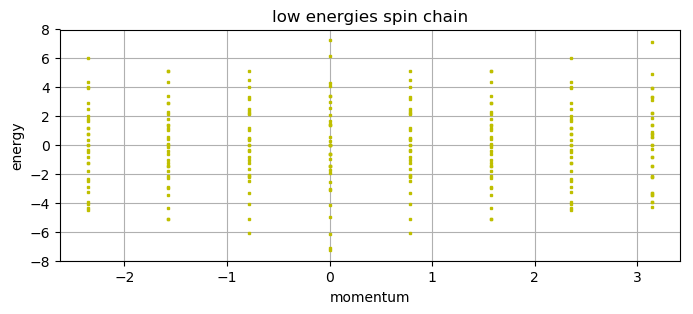

In [16]:
figure("low_energies",figsize=(8,3))

grid("on") # Create a grid on the axis
title("low energies spin chain")
#ax = gca()
#ax[:set_xlim]([-3,3])
#ax[:set_ylim]([-0.2,2.8])
xlabel("momentum")
ylabel("energy")
for i in 1:size(e,1)
    plot(k[i],e[i], marker = "s", markersize = 2, color = "y")
end

# Let us continue:
### We add the parity operator $P$, with $[H,P]=[T,P]=0$ (parity conservation)

In [23]:
# Let us quickly rebuild the Hamiltonian for N=3 spins and magnetic field angle theta = pi/4...
EE = kron(E,E)
HZ = kron(Z,EE) + kron(E,kron(Z,E)) + kron(EE,Z)
HXX = kron(XX,E)+kron(E,XX)+kron(X,kron(E,X))
H = -(HXX+HZ)/sqrt(2)
# ...and the translation operator for N=3 
T = kron(E,SWAP)*kron(SWAP,E)

# The parity operator P is
Z = [1 0; 0 -1]
N=3
P = copy(Z)
for i=2:N
    P = kron(P,Z)
end
#display(Z)
display(P)
#display(P^2)
#display(norm(H3*P-P*H3))
#display(norm(T*P-P*T))

UndefVarError: UndefVarError: E not defined

### Let us diagonalize $H$, $T$, and $P$ simultaneously, 
### $H |\Psi_i\rangle = e_i |\Psi_i\rangle$,   $~~~T |\Psi_i\rangle = \exp(ik_i) |\Psi_i\rangle$, and $~~~Z |\Psi_i\rangle = (-1)^p |\Psi_i\rangle$

In [48]:
HTP = H + 0.0001*T + im*0.01*P
D,U = eigen(HTP)

Eigen{Complex{Float64},Complex{Float64},Array{Complex{Float64},2},Array{Complex{Float64},1}}
eigenvalues:
8-element Array{Complex{Float64},1}:
      -2.82832712474619 + 0.01im                
   9.999999999990363e-5 + 0.010000000000000002im
    -2.4493897427831812 - 0.009999999999999998im
     2.4495897427831794 - 0.01im                
  -4.999999999980888e-5 - 0.01008660254037845im 
 -4.9999999999812686e-5 - 0.009913397459621557im
     1.4141635623730953 + 0.01008660254037852im 
      1.414163562373095 + 0.009913397459621606im
eigenvectors:
8×8 Array{Complex{Float64},2}:
 0.866025+0.0im           0.5+0.0im          …  -6.54205e-18-1.13333e-17im
     -0.0+0.0im           0.0+0.0im              1.50191e-16-1.79108e-16im
     -0.0+0.0im           0.0+0.0im             -4.42549e-17-2.08584e-16im
 0.288675-2.36066e-19im  -0.5-1.73472e-18im        -0.288675+0.5im        
     -0.0+0.0im           0.0+0.0im             -2.47956e-17+3.53874e-16im
 0.288675-2.36066e-19im  -0.5-1.73472e-18im  

### Let us compute and plot energies $e_i$, momenta $k_i$, and parity $p_i$

In [50]:
e = real(diag(U'*H*U)) 
k = angle.(diag(U'*T*U))
p = real(diag(U'*P*U))
p = round.((1 .- p)/2) 
perm = sortperm(e) # re-order eigenvalues according to E
e = e[perm]
k = k[perm] 
p = p[perm]
[e k p]


8×3 Array{Float64,2}:
 -2.82843       0.0           0.0
 -2.44949       0.0           1.0
 -1.13883e-31   2.0944        1.0
 -5.54732e-32   0.0           0.0
 -4.32111e-32  -2.0944        1.0
  1.41421       2.0944        0.0
  1.41421      -2.0944       -0.0
  2.44949      -3.85186e-32   1.0

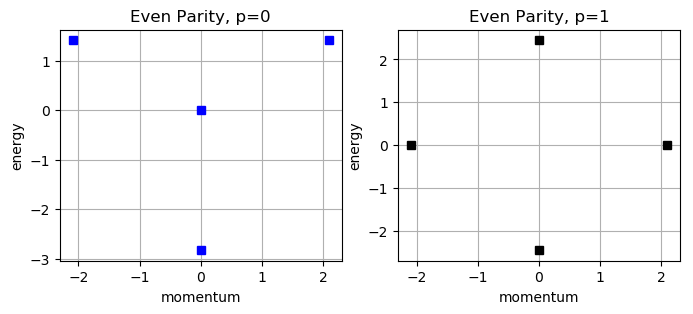

In [56]:
figure("low_energies",figsize=(8,3))

subplot(121) # Create the 1st axis of a 2x2 arrax of axes
grid("on") # Create a grid on the axis
title("Even Parity, p=0")
xlabel("momentum")
ylabel("energy")

subplot(122) # Create the 1st axis of a 2x2 arrax of axes
grid("on") # Create a grid on the axis
title("Even Parity, p=1")
xlabel("momentum")
ylabel("energy")

for i in 1:size(e,1)
    if p[i] == 0
        subplot(121)
        plot(k[i],e[i], marker = "s", color = "b")
    elseif p[i] == 1
        subplot(122)
        plot(k[i],e[i], marker = "s", color = "k")
    end
end   

# It's your turn for the last time! (3/3)
### 5) write a function buildP that builds the parity operator $P$ for $N$ spins (use only for $N\leq 10$)

In [20]:
# function buildP takes as input N (number of spins) and outputs P (parity operator)
function buildP(N::Int64)::Array{Float64,2} 
    Z = [1 0; 0 -1]
    P = copy(Z)
    for i=2:N
        P = kron(P,Z)
    end 
    return P
end

buildP(3) # test for N=3  

8×8 Array{Float64,2}:
 1.0   0.0   0.0  0.0   0.0  0.0  0.0   0.0
 0.0  -1.0   0.0  0.0   0.0  0.0  0.0   0.0
 0.0   0.0  -1.0  0.0   0.0  0.0  0.0   0.0
 0.0   0.0   0.0  1.0   0.0  0.0  0.0   0.0
 0.0   0.0   0.0  0.0  -1.0  0.0  0.0   0.0
 0.0   0.0   0.0  0.0   0.0  1.0  0.0   0.0
 0.0   0.0   0.0  0.0   0.0  0.0  1.0   0.0
 0.0   0.0   0.0  0.0   0.0  0.0  0.0  -1.0

### 6) compute and plot energies $e_i$ as a function of momenta $k_i$ for $N=8$ spins and $\theta=\pi/4$, for parity $p=0,1$

In [37]:
N=9
H = buildH(N,pi/4)
T = buildT(N)
P = buildP(N)
HTP = H + 0.0001*T + im*0.01*P
D,U = eigen(HTP);

In [41]:
e = real(diag(U'*H*U)) 
k = angle.(diag(U'*T*U))
p = real(diag(U'*P*U))
p = round.((1 .- p)/2) 
perm = sortperm(e) # re-order eigenvalues according to E
e = e[perm]
k = k[perm] 
p = p[perm]
[e k p];

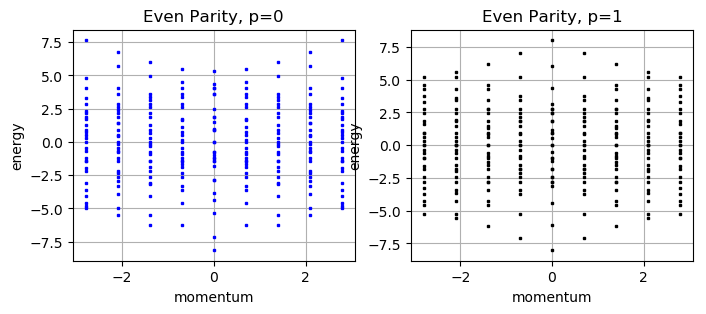

In [42]:
figure("low_energies",figsize=(8,3))

subplot(121) # Create the 1st axis of a 2x2 arrax of axes
grid("on") # Create a grid on the axis
title("Even Parity, p=0")
xlabel("momentum")
ylabel("energy")

subplot(122) # Create the 1st axis of a 2x2 arrax of axes
grid("on") # Create a grid on the axis
title("Even Parity, p=1")
xlabel("momentum")
ylabel("energy")

for i in 1:size(e,1)
    if p[i] == 0
        subplot(121)
        plot(k[i],e[i], marker = "s", markersize = 2, color = "b")
    elseif p[i] == 1
        subplot(122)
        plot(k[i],e[i], marker = "s", markersize = 2, color = "k")
    end
end   

# Good job!!! (maybe...)